In [7]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings('ignore')

In [31]:
# loading the dataset

svm_data=pd.read_csv(r'./csv_files/pulsar_data_train.csv')

In [32]:
# displaying the data 

svm_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [33]:
#displaying the columns names

svm_data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [34]:
# the columns names are too big, so we will rename the column name with removing the leading white space

svm_data.columns=svm_data.columns.str.strip()

In [35]:
svm_data.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [36]:
# renaming the column names:
# 1) integrated profile=IP
# 2) delta modulation and signal to noise ratio=DM-SNR
# 3) Standard deviation=SD

svm_data.columns=['IP Mean', 'IP SD', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean', 'DM-SNR SD', 'DM-SNR Kurtosis', 
             'DM-SNR Skewness', 'target_class']

In [37]:
# dataset with renamed columns names

svm_data.head()

,IP Mean,IP SD,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR SD,DM-SNR Kurtosis,DM-SNR Skewness,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [39]:
# displaying the shape of the dataset
    
svm_data.shape

(12528, 9)

In [40]:
# displaying the descriptive statistics 

svm_data.describe()

,IP Mean,IP SD,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR SD,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [41]:
# making the round of 2 after the decimal

round(svm_data.describe(),2)

,IP Mean,IP SD,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR SD,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.00,12528.00,10793.00,12528.00,12528.00,11350.00,12528.00,11903.00,12528.00
mean,111.04,46.52,0.48,1.78,12.67,26.35,8.33,105.53,0.09
std,25.67,6.80,1.06,6.21,29.61,19.61,4.54,107.40,0.29
min,5.81,24.77,-1.74,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.87,42.36,0.02,-0.19,1.91,14.40,5.80,35.20,0.00
50%,115.18,46.93,0.22,0.20,2.79,18.41,8.45,83.13,0.00
75%,127.11,50.98,0.47,0.93,5.41,28.34,10.73,140.00,0.00
max,189.73,91.81,8.07,68.10,222.42,110.64,34.54,1191.00,1.00


In [42]:
# finding the meta data of the dataset

svm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP SD            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR SD        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [43]:
# finding the missing value

svm_data.isnull().sum()

IP Mean               0
IP SD                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR SD          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

In [55]:
# finding the percentrage of missing values


percentage_missing=svm_data.isnull().sum()/float(len(svm_data))
percentage_missing

IP Mean            0.000000
IP SD              0.000000
IP Kurtosis        0.138490
IP Skewness        0.000000
DM-SNR Mean        0.000000
DM-SNR SD          0.094029
DM-SNR Kurtosis    0.000000
DM-SNR Skewness    0.049888
target_class       0.000000
dtype: float64

In [56]:
# this columns have missing value and data type are float

print(svm_data['IP Kurtosis'].dtype)
print(svm_data['DM-SNR SD'].dtype)
print(svm_data['DM-SNR Skewness'].dtype)

float64
float64
float64


In [58]:
# we will handle the missing value by mean

svm_data['IP Kurtosis']=svm_data['IP Kurtosis'].fillna(svm_data['IP Kurtosis'].mean().astype(float))
svm_data['DM-SNR SD']=svm_data['DM-SNR SD'].fillna(svm_data['DM-SNR SD'].mean().astype(float))
svm_data['DM-SNR Skewness']=svm_data['DM-SNR Skewness'].fillna(svm_data['DM-SNR Skewness'].mean().astype(float))

In [59]:
# after handlig the missing value, lets check the agin if there is missing value of not

svm_data.isnull().sum()

IP Mean            0
IP SD              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR SD          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

In [ ]:
# there is no such missing value in the data set

In [66]:
# displaying the total of target column

svm_data.iloc[:,-1].value_counts()

target_class
0.0    11375
1.0     1153
Name: count, dtype: int64

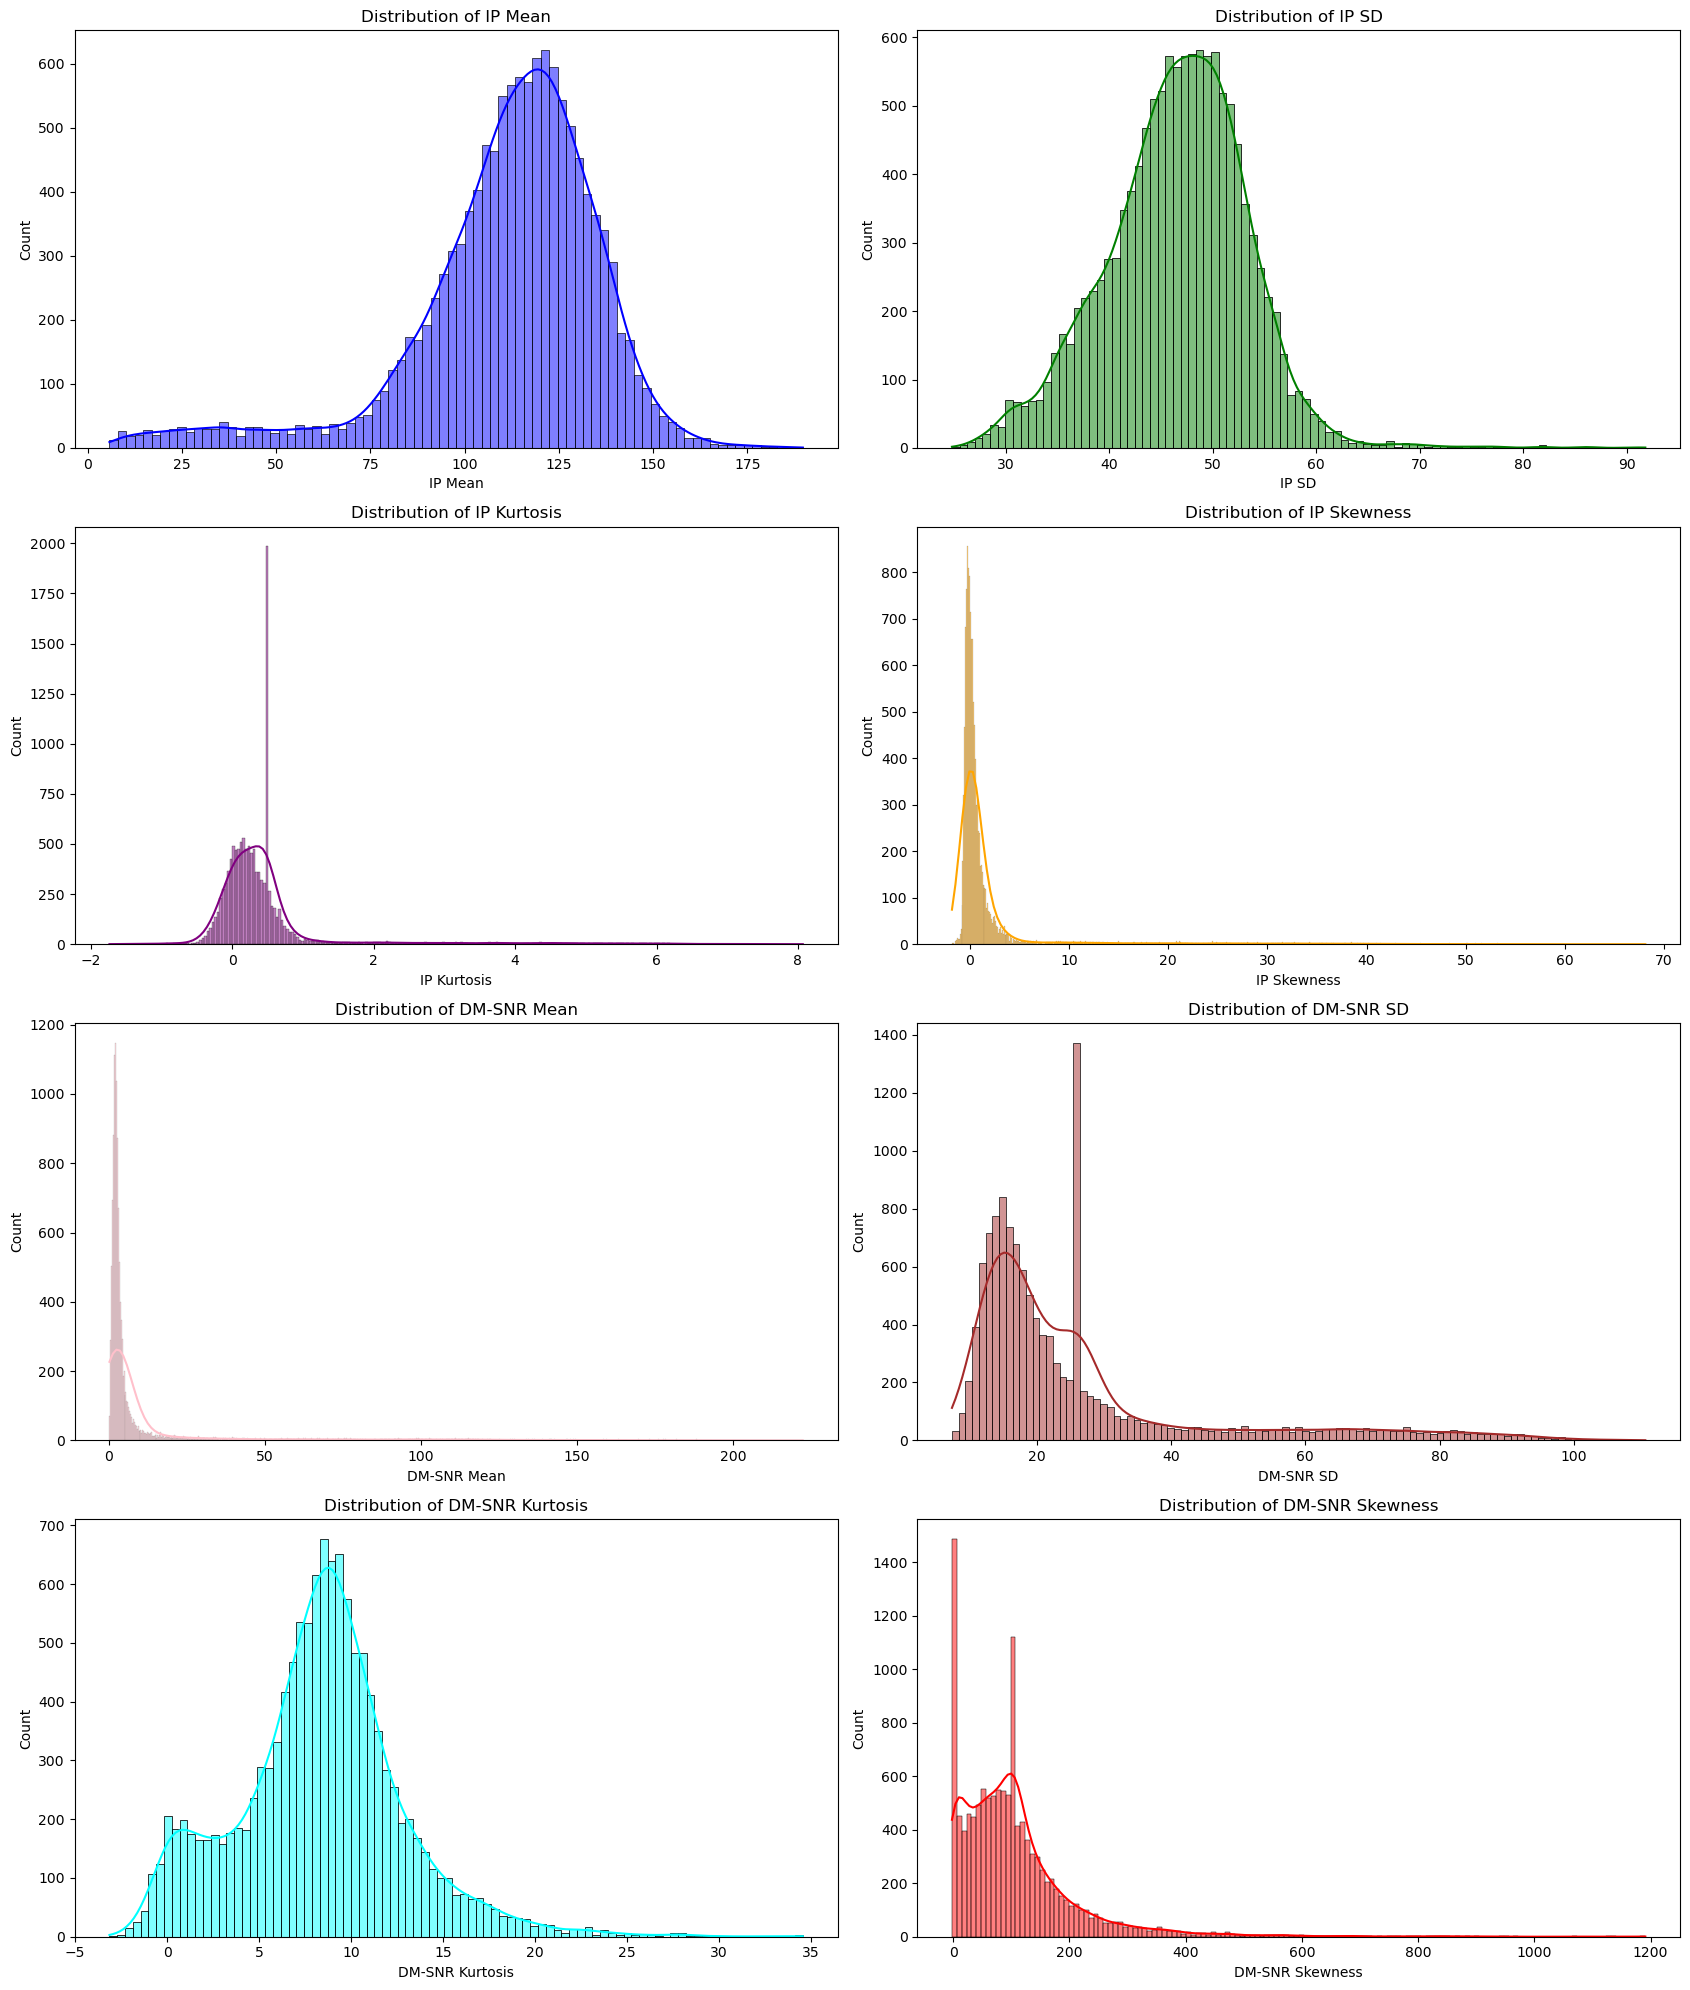

In [72]:
# finding the distribution of the data which describes the:
# 1) how much features data points have distributed or spread in data(checks the normal (GAUSSIAN) distribution)
# 2) skeweness in the data points
# 3) we can identify the outliers using the distribution
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'cyan']
plt.figure(figsize=(17,20))
for i, column in enumerate(svm_data.columns[:-1],1): # we are taking the each features from dataset excluding target feature and this are itreable 
    plt.subplot(4,2,i)  # creating the sub plot that will display the each features of dataset
    sns.histplot(svm_data[column],kde=True, color=colors[i % len(colors)]) # creating the histogram and kernal distribution estimation smoothen on datapoints
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
plt.show()

## On observing the distribution of each data column, we can see that the columns are having the OUTLIER's

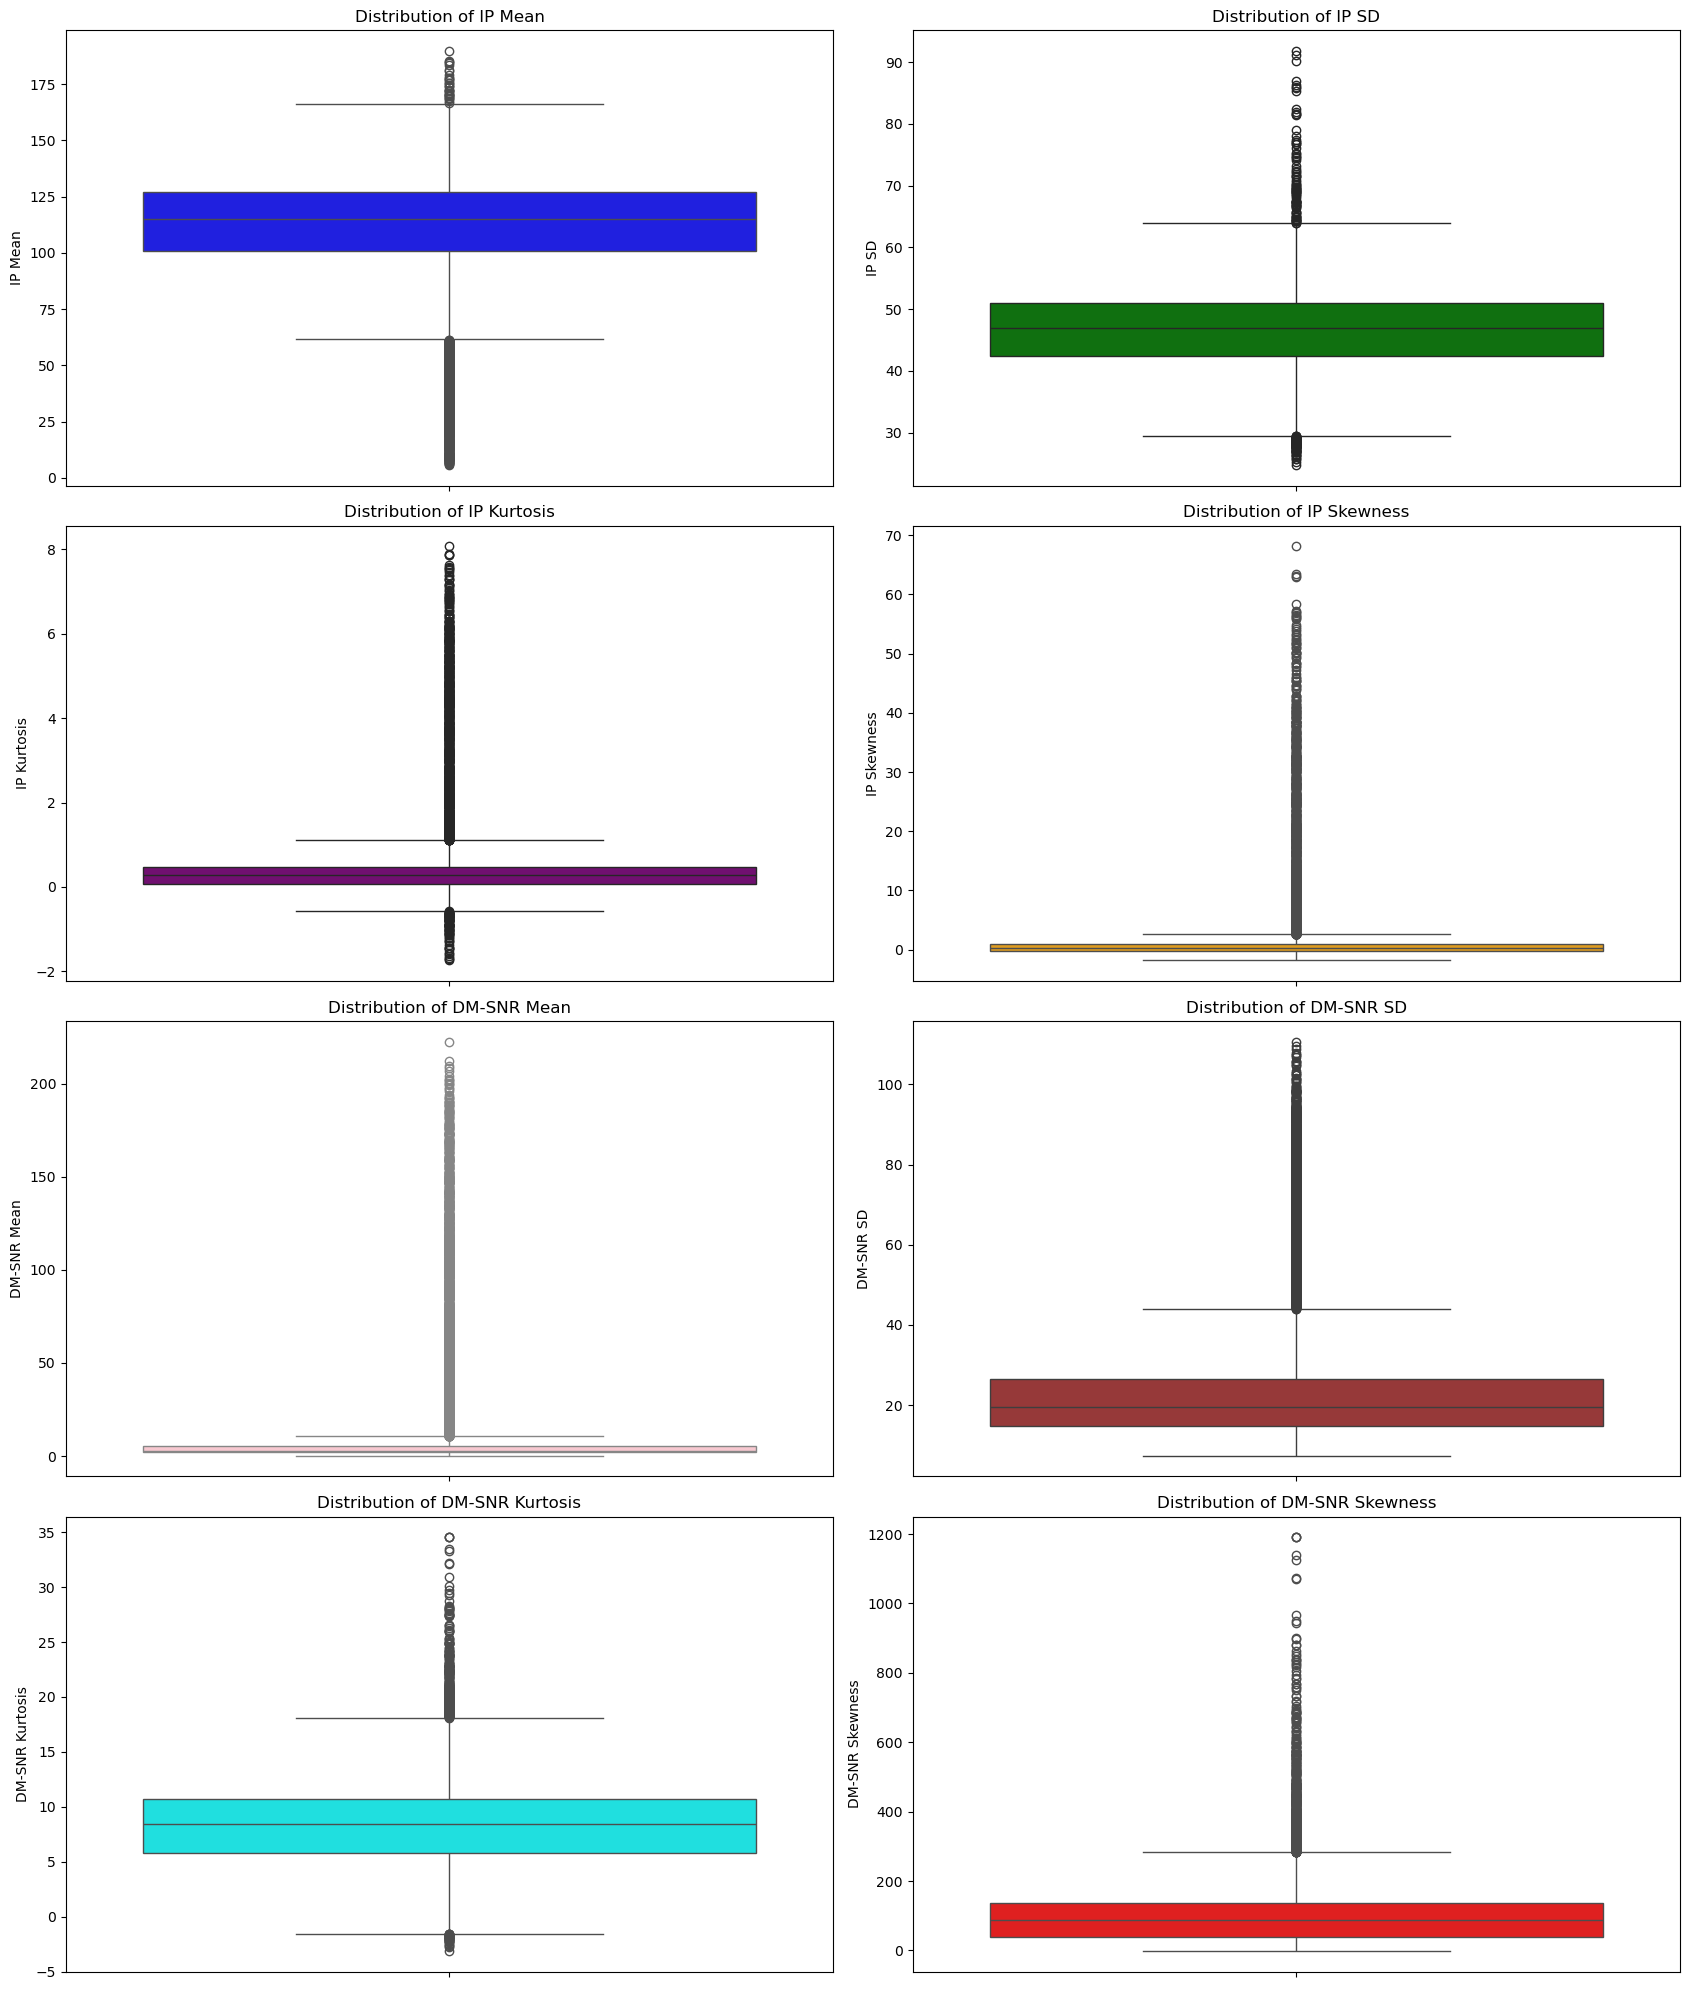

In [74]:
# to see the Outliers, we can plot the BOX-Plot 

colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'cyan']
plt.figure(figsize=(17,20))
for i, column in enumerate(svm_data.columns[:-1],1): # we are taking the each features from dataset excluding target feature and this are itreable 
    plt.subplot(4,2,i)  # creating the sub plot that will display the each features of dataset
    sns.boxplot(data=svm_data[column], color=colors[i % len(colors)]) # creating the histogram and kernal distribution estimation smoothen on datapoints
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
plt.show()

The Correlation matrix is: 
                  IP Mean     IP SD  IP Kurtosis  IP Skewness  DM-SNR Mean  \
IP Mean          1.000000  0.551105    -0.808431    -0.737598    -0.298123   
IP SD            0.551105  1.000000    -0.487920    -0.539896    -0.001656   
IP Kurtosis     -0.808431 -0.487920     1.000000     0.877284     0.385326   
IP Skewness     -0.737598 -0.539896     0.877284     1.000000     0.412659   
DM-SNR Mean     -0.298123 -0.001656     0.385326     0.412659     1.000000   
DM-SNR SD       -0.300864 -0.055638     0.392646     0.408672     0.764647   
DM-SNR Kurtosis  0.235781  0.031671    -0.318348    -0.328675    -0.616385   
DM-SNR Skewness  0.142737  0.028008    -0.195143    -0.197847    -0.345690   

                 DM-SNR SD  DM-SNR Kurtosis  DM-SNR Skewness  
IP Mean          -0.300864         0.235781         0.142737  
IP SD            -0.055638         0.031671         0.028008  
IP Kurtosis       0.392646        -0.318348        -0.195143  
IP Skewness      

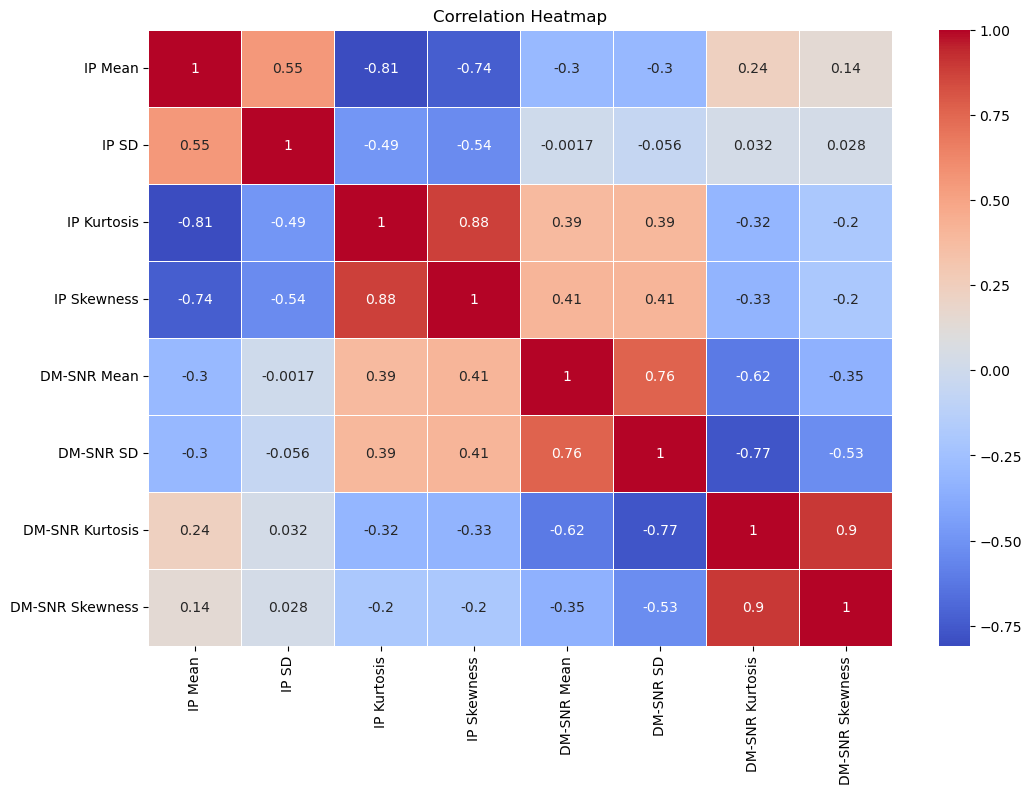

In [75]:
# finding the correlation between the features 

correlation_matrix = svm_data.iloc[:, :-1].corr()  # Finds the correlation coefficients(PEARSON CORRELATION) between multiple variables (range -1 to +1)
print(f"The Correlation matrix is: \n{correlation_matrix}\n")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5) # displays the heatmap (correlation matrix) 
plt.title("Correlation Heatmap")
plt.show()

In [76]:
# dividing the dataset into independent and dependent feature

x=svm_data.iloc[:,:-1] # selects the independent features
y=svm_data.iloc[:,-1] # selects the target feature

In [80]:
x.head()

,IP Mean,IP SD,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR SD,DM-SNR Kurtosis,DM-SNR Skewness
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,26.351318,2.958066,7.197842
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128


In [81]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target_class, dtype: float64

In [85]:
# Now we are spliting the data into training and testing part

x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [86]:
# displaying the traing data

x_train, y_train 

(          IP Mean      IP SD  IP Kurtosis  IP Skewness  DM-SNR Mean  \
 2589   110.664062  46.558478     0.478548     0.125224     3.012542   
 11868  128.031250  40.147762     0.478548     0.655912     4.748328   
 7199   124.484375  47.029077     0.070730     0.163261     1.325251   
 315    107.554688  45.707085     0.380770     0.799653     1.981605   
 11953  132.703125  43.001337    -0.107772     0.456369     2.282609   
 ...           ...        ...          ...          ...          ...   
 11964  105.820312  32.781338     0.461897     3.052894     2.389632   
 5191   109.429688  44.496784     0.435213     0.692732     0.744983   
 5390    10.898438  35.174973     5.568874    31.585748    74.291806   
 860    105.781250  48.050256     0.478548     0.405070     3.558528   
 7270   123.671875  43.217132    -0.406370     0.439833     8.686455   
 
        DM-SNR SD  DM-SNR Kurtosis  DM-SNR Skewness  
 2589   19.656856         8.038275       105.525779  
 11868  23.620347         

In [117]:
# displaying the shape

x_train.shape, x_test.shape 

((10022, 8), (2506, 8))

In [88]:
# displaying the testing data

x_test, y_test

(          IP Mean      IP SD  IP Kurtosis  IP Skewness  DM-SNR Mean  \
 7488   121.421875  52.272664     0.048222    -0.311577    13.484114   
 3776   119.796875  61.044983     0.191088    -0.622848     2.108696   
 6243   133.257812  50.598025     0.179646    -0.314778     0.795151   
 6123   132.710938  55.998905    -0.192935    -0.379687     2.290134   
 4714    94.906250  46.068807     0.954500     1.259574   160.932274   
 ...           ...        ...          ...          ...          ...   
 2664   133.320312  53.503787     0.147843    -0.305718     6.331940   
 6518   124.617188  46.860518     0.263878    -0.103966     1.620401   
 10684  138.546875  51.860820     0.135626    -0.546714     2.816054   
 6245   102.835938  46.333839     0.478548     0.665064     2.235786   
 7381   105.585938  48.310119     0.462673     0.322049     2.325251   
 
        DM-SNR SD  DM-SNR Kurtosis  DM-SNR Skewness  
 7488   44.234692         3.214363         9.044231  
 3776   15.224075        1

In [92]:
# displaying the shape 

y_train.shape, y_test.shape 

((10022,), (2506,))

In [95]:
# selecting the model

model = SVC(kernel='linear', random_state=42)
model

SVC(kernel='linear', random_state=42)

In [96]:
# fitting the model i.e fitting the training data points in to the model

model.fit(x_train,y_train) # model has been fitted with training dataset-

SVC(kernel='linear', random_state=42)

In [97]:
# now, we have to make some prdiction on testing data

prediction_data=model.predict(x_test)

In [100]:
# predicted data points are

prediction_data

array([0., 0., 0., ..., 0., 0., 0.])

In [101]:
# creating the confusion matrix

conf = confusion_matrix(y_test, prediction_data)
print(f'The confusion matrix of this Logistic Regression is: \n{conf}')

The confusion matrix of this Logistic Regression is: 
[[2272    7]
 [  49  178]]


In [108]:
# finding the correct and false prediction and the accuracy using the confusion matrix

shape_conf = conf.shape
correct_Pred = 0
false_Pred = 0

for row in range(shape_conf[0]):
    for column in range(shape_conf[1]):
        if row == column:
            correct_Pred +=conf[row,column]
        else:
            false_Pred += conf[row,column]
print('Correct predictions: ', correct_Pred)
print('False predictions', false_Pred)
print ('Accuracy of the SUPPORT VECTOR MACHINE is: ', correct_Pred/(conf.sum())) 

Correct predictions:  2450
False predictions 56
Accuracy of the SUPPORT VECTOR MACHINE is:  0.9776536312849162


In [109]:
# findiing the accuracy of the model

print ("The accuracy of SUPPORT VECTOR MACHINE is : ", accuracy_score(y_test, prediction_data))

The accuracy of SUPPORT VECTOR MACHINE is :  0.9776536312849162


In [110]:
# finding the F1-SCORE of the model

print("The F1-Score of SUPPORT VECTOR MACHINE is: ",f1_score(y_test,prediction_data))

The F1-Score of SUPPORT VECTOR MACHINE is:  0.8640776699029126


In [111]:
# finding the Precision of the model

precision = precision_score(y_test, prediction_data)
print("Precision Score of SUPPORT VECTOR MACHINE is:", precision)

Precision Score of SUPPORT VECTOR MACHINE is: 0.9621621621621622


In [114]:
#finding the RECALL-SCORE of the model

recall = recall_score(y_test, prediction_data,average='weighted')
print("Recall Score of SUPPORT VECTOR MACHINE is:", recall)

Recall Score of SUPPORT VECTOR MACHINE is: 0.9776536312849162
